In [21]:
import os 
import zipfile
import random
import tensorflow as tf
import shutil 
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile 
from os import getcwd
import numpy as np

In [16]:
def extract_file(path, path_extract):
    file = zipfile.ZipFile(path,"r")
    file.extractall(path_extract)
    file.close()

In [ ]:
os.makedirs("cats_vs_dogs_files/test")
os.makedirs("cats_vs_dogs_files/train")
shutil.move("test1.zip", "cats_vs_dogs_files/test/test1.zip")
shutil.move("train.zip", "cats_vs_dogs_files/train/train.zip")

In [17]:
try:
    extract_file("cats_vs_dogs_files/test/test1.zip", "cats_vs_dogs_files/test/" )
except OSError:
    pass

In [18]:
try:
    extract_file("cats_vs_dogs_files/train/train.zip", "cats_vs_dogs_files/train/")
except OSError:
    pass

In [3]:
path_train = "cats_vs_dogs_files/train/train/"
print(len(os.listdir(path_train)))

2


### Opcion de cargar desde el programa

In [29]:
data_with_label = []
def label_data():
    for image in os.listdir(path_train):
        if image[:3] == "cat":
            data_with_label.append([image , "cat" ])
        else :
            data_with_label.append([image, "dog"])
        
label_data()

In [36]:
def split_data():
    np.random.shuffle(data_with_label)
    data_train = data_with_label[:20000]
    data_val = data_with_label[20000:]
    return data_train, data_val

### Opcion de cargar desde el directorio

In [40]:
def move_image():    
    for image in os.listdir(path_train):
        if image[:4] == "cat.":
            shutil.move(path_train +"/"+image, path_train + "/" + "cats" + "/" + image)
        elif image[:4] == "dog.":
            shutil.move(path_train +"/"+image, path_train + "/" + "dogs" + "/" + image)

In [39]:
## Hacer carpetas para cada tipo 
try:
    os.makedirs(path_train +"/"+ "cats")
    os.makedirs(path_train +"/"+ "dogs")
except OSError:
    pass


In [41]:
## Mover imagen a las carpetas 
try:
    move_image()
except OSError:
    pass

In [4]:
image_data_gen = ImageDataGenerator(rescale=1/255.0)
image_train = image_data_gen.flow_from_directory(path_train, 
                                                 target_size=(200, 200), 
                                                 batch_size=64, 
                                                 class_mode='binary')


Found 25000 images belonging to 2 classes.


In [5]:
def built_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(16 ,kernel_size = (3,3) ,activation='relu', input_shape = (200, 200, 3)),
        tf.keras.layers.MaxPool2D(2,2),
        tf.keras.layers.Conv2D(32 , kernel_size = (3,3), activation= 'relu'),
        tf.keras.layers.MaxPool2D(2,2),
        tf.keras.layers.Conv2D(64 , kernel_size = (3,3), activation= 'relu'),
        tf.keras.layers.MaxPool2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256,activation='relu'),
        tf.keras.layers.Dense(1, activation = 'sigmoid')
    ])
    model.compile(loss = 'binary_crossentropy', optimizer = RMSprop(lr = 0.001), metrics = ['accuracy'])
    return model

In [6]:
model = built_model()
history = model.fit(image_train, steps_per_epoch =10, epochs =30, verbose = 1)

  ...
    to  
  ['...']
Train for 10 steps
Epoch 1/30
10/10 [==============================] - 125s 12s/step - loss: 2.9112 - accuracy: 0.5031
Epoch 2/30
10/10 [==============================] - 100s 10s/step - loss: 0.7005 - accuracy: 0.5094
Epoch 3/30
10/10 [==============================] - 90s 9s/step - loss: 0.6881 - accuracy: 0.5688
Epoch 4/30
10/10 [==============================] - 92s 9s/step - loss: 0.6815 - accuracy: 0.5375
Epoch 5/30
10/10 [==============================] - 78s 8s/step - loss: 0.6790 - accuracy: 0.5766
Epoch 6/30
10/10 [==============================] - 80s 8s/step - loss: 0.6785 - accuracy: 0.6062
Epoch 7/30
10/10 [==============================] - 87s 9s/step - loss: 0.6912 - accuracy: 0.6031
Epoch 8/30
10/10 [==============================] - 80s 8s/step - loss: 0.6424 - accuracy: 0.6281
Epoch 9/30
10/10 [==============================] - 76s 8s/step - loss: 0.6699 - accuracy: 0.6125
Epoch 10/30
10/10 [==============================] - 97s 10s/step - lo

In [7]:
model.save("model_cats_vs_dogs.h5")

In [39]:
path_test = "cats_vs_dogs_files/test/test1/"
image_view = [os.path.join(path_test,images ) for images in os.listdir(path_test)[:10]]

In [41]:
import matplotlib.pyplot as plt 
from tensorflow.keras.preprocessing import image

In [43]:
list_image = []
for images in image_view:
    image_array = image.load_img(images,target_size=(200,200,3)) 
    image_array = image.img_to_array(image_array)
    image_array = np.expand_dims(image_array, axis=0)
    list_image.append(image_array)

In [54]:
predicts = [model.predict(images) for images in list_image]

In [61]:
predicts[4][0][0]

1.0

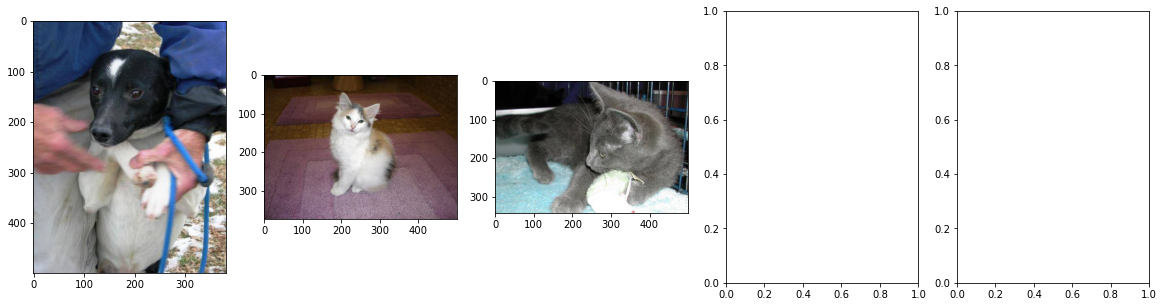

In [97]:
image_read =[ plt.imread(image_view[i]) for i in range(5)]
f,ax=plt.subplots(1,5, figsize =(20,5))
ax[0].imshow(image_read[0])
ax[1].imshow(image_read[1])
ax[2].imshow(image_read[2])